# Lecture notes for 09 08 2020

# Today's Lecture Plan:

## Son of Collisional Rates (Collisional Excitation)
### $\star$ (Re)Definition of Variables
### $\star$ The Two-Level Atom
### $\star$ Critical Densities and Thermalization
### $\star$ The Three-Level Atom
### $\star$ The Boltzmann (Excitation) Equation

## Challenge time: Calculate critical densities

In [5]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion



                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
#plt.rc('text', usetex=True)      
plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer

from astropy import constants as const

# Redefining Variables

## Collisional Rate Coefficients

Once again, we are returning to the concept of collisional rate coefficients. Yes, we have seen this before (see **August 28 notes**!) and, as foreshadowed there, we are going to redefine this quantity using a new variable. 

We will define collisional excitation as a collision that results in a change of the internal energy states of the species of interest. This change can be described as a transition from energy state $E_i$ to energy state $E_f$. The collisional rate coefficient for the process is written $k_{if}$ where $k_{if} \equiv \langle \sigma v \rangle_{i\rightarrow f}$

As before, the units of a collisional rate coefficient are Volume / time (or for example, cm$^3$ s$^{-1}$). 

A collisional excitation reaction for a given species $X$ with some partner (for example, an electron) can be written as

$X_i + e^- \longrightarrow X_f + e^-$

or just 

$X + e^- \longrightarrow X^* + e^-$, where the * indicates an arbitrary excited state.

We can express the rate at which the population of level $f$ changes with time due to both collisional excitation and collisional de-excitation as 

$\frac{dn_f}{dt} = n_c (n_i k_{if} - n_f k_{fi})$, where $n_c$ is the number density of the collision partner. 


## Radiative Transition Rates

When we talk about changes between internal energy states, we also have define those which we can directly observe: radiative transitions that result in the emission (or absorption) of a photon (Note that we can only "see" evidence of collisional excitation through the subsequent radiative decay of the atom/molecule out of the excited level). 

### Einstein A Coefficients
For emission transitions, the likelihood that such a radiative transition actually occurs and we can observe it is given by the radiative transition probability, commonly referred to as the "Einstein A coefficient" for spontaneous emission. In **Chapter 17**, Draine writes this coefficient as $A_{if}$. As with our collisional rate coefficient, this is a coefficient that is specific to a single transition between two energy levels (going from $E_i$ to $E_f$) of a particular species. However, as there is the additional requirement that $E_i>E_f$, you will often see this written as $A_{ul}$: a reminder that this is a transition from an upper to a lower energy level (See **Draine 6.1**). We can write out this "reaction" for a species $X$ as:

$X_u \longrightarrow X_l  + h\nu $ where $ h\nu = E_u - E_l$

We first encountered Einstein A values in the previous lecture (See **September 1 notes**!) when we were quantifying the difference between allowed and forbidden transitions. Note that the units are slightly different than those of the collisional rate coefficients: the Einstein A is simply a characteristic rate (per time) at which a photon will be emitted (e.g., s$^{-1}$).

Because of these units, we can define a characteristic timescale for spontaneously emitting a photon as $t_{em} = \frac{1}{A_{ul}}$

We can also use the Einstein A to start writing an expression (a differential equation) for the rate at which the population $X$ in the lower level $E_l$ (or the upper level $E_u$ changes as a function of time. Solely due to spontaneous emission, we have:

$\left(\frac{dn_l}{dt}\right) = -\left(\frac{dn_u}{dt}\right) = n_u A_{ul}$



### Einstein B Coefficients

There are two other relevant rates when considering radiative transitions (See **Draine 6.1**):


The first is the **_stimulated emission rate_** (the Einstein B stimulated emission coefficient, $B_{ul}$). 
Stimulated emission occurs if there are already a bunch of photons present with the exact wavelength that separates the upper and lower levels of $X$-- and not just the same wavelength, but also the same polarization and direction of wave propagation. This causes the following reaction: 

$X + h\nu \longrightarrow X + 2h\nu$ where $ h\nu = E_u - E_l$

You might notice that this reaction 'amplifies' the amount of light emitted, and indeed stimulated emission is a key component of maser and laser transitions. 
Note that unlike $A_{ul}$, the stimulated emission rate depends on the density of appropriate photons. The units of $B_{ul}$ are Volume/ Energy / time$^2$ (e.g., m$^3$ J$^{-1}$ s$^{-2}$) and B$_{ul}$ thus represents the probability of emission per unit time per unit spectral radiance of the radiation field (tune in **September 10** for a full radiative transfer rundown and the definition of spectral radiance). 

To fold $B_{ul}$ into our equation for the rate of change of our level populations, we can then write the full rate equation for the *downward* radiative transitions as

$\left(\frac{dn_l}{dt}\right)_{u\rightarrow l} = -\left(\frac{dn_u}{dt}\right)_{u\rightarrow l} = n_u (A_{ul}+B_{ul}u_\nu)$

where $u_{\nu}$ is the radiation energy density per unit frequency (and also yet another example of a symbol that has too many different contextually-dependent meanings.) 


The second is the **_absorption rate_** (the Einstein B absorption coefficient, $B_{lu}$). This corresponds to the reaction

$X_l + h\nu  \longrightarrow X_u$ where $ h\nu = E_u - E_l$


Once again, we have a rate that is dependent on the radiation field, specifically the density of photons with energy $h\nu$, so we can write the rate of change of the level populations due to *upward* transitions as:

$\left(\frac{dn_u}{dt}\right)_{l\rightarrow u} = -\left(\frac{dn_l}{dt}\right)_{l\rightarrow u} = n_l B_{lu} u_\nu$


Putting the upward and downward radiative transitions together, we have:

$\frac{dn_u}{dt} = \left(\frac{dn_u}{dt}\right)_{l\rightarrow u} + \left(\frac{dn_u}{dt}\right)_{u\rightarrow l} = n_l B_{lu} u_\nu - n_u (A_{ul}+B_{ul}u_\nu)$


For the case of a radiation field described by a blackbody (thermal radiation) we can write

$u_\nu = \frac{4\pi}{c} B_\nu = \frac{8\pi h\nu^3}{c^3} \frac{1}{\exp(h\nu/kT)-1}$

Since this must be true in both the limits $T\rightarrow \infty$ and $T\rightarrow 0$, we can define some relationships between the Einstein A's and B's:

$B_{ul} = \frac{c^3}{8\pi h \nu^3} A_{ul}$


$B_{lu} = \frac{g_u}{g_l} B_{ul}$




# The Two-Level Atom


## Full Rate Equation
Incorporating collisional (de)excitation, we can make a full expression for the rate at which the level populations of a two-level system (atom or molecule) will change. 

$\frac{dn_u}{dt} = n_l ( B_{lu} u_\nu +k_{lu} n_c) - n_u (A_{ul}+B_{ul}u_\nu+k_{ul} n_c)$

Note that for symmetry with the Einstein A's and B's, you will sometimes see collisional (de)excitation rates written as $C_{lu}$ and $C_{ul}$ where 

$C_{lu} = k_{lu} n_l$

and


$C_{ul} = k_{ul} n_u$


Using this notation, we can visually express the rates in a two-level atom in the following plot. 

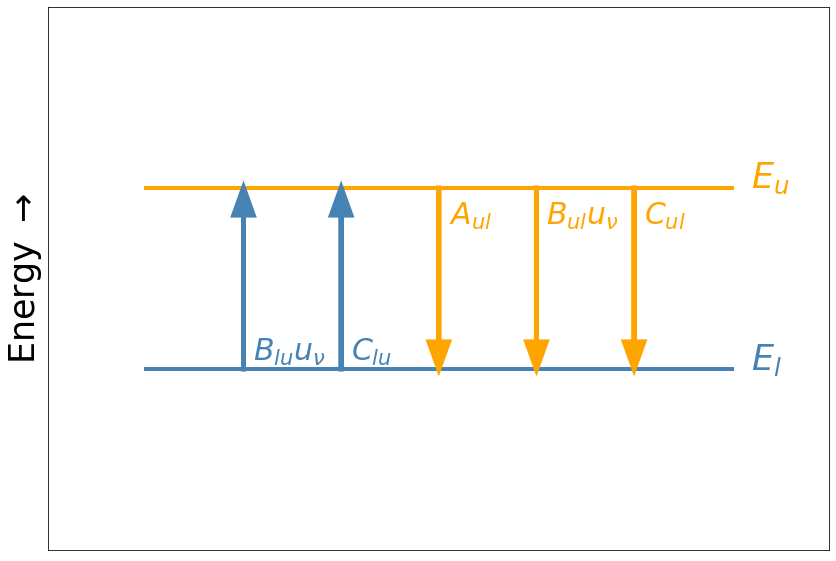

In [2]:
plt.figure(1,figsize=(14,10))
fig=plt.subplot(1,1,1)
plt.plot((5,35),(10,10),lw=4,color='steelblue',zorder=0)
plt.text(36,10,'$E_l$',fontsize=35,color='steelblue')
plt.plot((5,35),(20,20),lw=4,color='orange',zorder=1)
plt.text(36,20,'$E_u$',fontsize=35,color='orange')
plt.ylim(0,30)
plt.xlim(0,40)
plt.arrow(10,10,0,10,color='steelblue',lw=5,head_width=1,length_includes_head=True)
plt.text(10.5,10.5,'$B_{lu} u_\\nu$',fontsize=30,color='steelblue')
plt.arrow(15,10,0,10,color='steelblue',lw=5,head_width=1,length_includes_head=True)
plt.text(15.5,10.5,'$C_{lu}$',fontsize=30,color='steelblue')
plt.arrow(20,20,0,-10,color='orange',lw=5,head_width=1,length_includes_head=True)
plt.text(20.5,18,'$A_{ul}$',fontsize=30,color='orange')
plt.arrow(25,20,0,-10,color='orange',lw=5,head_width=1,length_includes_head=True)
plt.text(25.5,18,'$B_{ul} u_\\nu$',fontsize=30,color='orange')
plt.arrow(30,20,0,-10,color='orange',lw=5,head_width=1,length_includes_head=True)
plt.text(30.5,18,'$C_{ul}$',fontsize=30,color='orange')
fig.axes.get_xaxis().set_ticks([])
fig.axes.get_yaxis().set_ticks([])
plt.ylabel('Energy $\\rightarrow$',fontsize=35);

## Steady-State Solution

The condition for balance is:

$\frac{dn_u}{dt} = 0$

$n_l ( B_{lu} u_\nu +k_{lu} n_c) = n_u (A_{ul}+B_{ul}u_\nu+k_{ul} n_c)$

$\frac{n_u}{n_l} = \frac{  B_{lu} u_\nu +k_{lu} n_c}{ A_{ul}+B_{ul}u_\nu+k_{ul} n_c}$

Note that in **Draine Ch. 17** you will see this written in terms of just $A_{ul}$, $k_{ul}$, and $k_{lu}$, using the relationships derived between the Einstein A's and Einstein B's, as well as a quantity called the photon occupation number $\bar{n}_\gamma$ (averaged over all angles and polarizations), which collects some of the terms from the Blackbody equation: 


$\bar{n}_\gamma = \frac{c^3}{8 \pi h \nu^3} u_\nu$


# Critical Densities and Thermalization

### How to calculate

The critical density $n_{crit}$ is defined as the density of collision partners $n_c$ for which the rate of spontaneous emission is equal to the rate of collisional de-excitation. For a two-level system, and ignoring for now the external radiation field, we can then express the critical density as

$n_{crit} = \frac{A_{ul}}{k_{ul}}$

You can verify that this indeed yields units of Volume$^{}-1$. 

### What does it mean

Given the relationship between the upward and downward collisional rate coefficients, which comes from the Boltzmann equation:

$k_{ul} = \frac{g_u}{g_l} k_{lu} \exp\left(\frac{E_l - E_u}{kT_{kin}}\right)$

the critical density for a given gas temperature is often interpreted by observers as the ballpark gas density required to observe emission from a given spectral line. This is because this is roughly where the rate of upward collisional excitation exceeds the rate of downward radiative excitation, which should populate the upper energy level sufficiently to have some reliable and detectable number of photons emitted through spontaneous emission. 

In practice, this is a fraught interpretation of critical density that should not be used as a proxy for measuring gas densities, as it can overestimate the true gas densities by an order of magnitude or more.  

### But what does it really mean

Instead, the critical density is better understood as a measure of when species $X$ approaches local thermodynamic equilibrium or "thermalization" with its collision partner. Below this density, the de-excitation of an atom or molecule from a given excited energy level is dominated by spontaneous emission of a photon. As a result, energy is removed from the gas, keeping species $X$ at a temperature less than the kinetic temperature $T_{kin}$ which is defined by the collision partners (usually a much more abundant species like H, H$_2$, or $e^-$). In reality, even this is not always a reliable metric of gas thermalization, whether due to the presence of a significant radiation field or the simplistic assumption of a two-level atom (when in fact there are transitions between many other energy levels that must be considered). 

As an example, **Draine Figure 17.2** shows that the H spin temperature only approaches the gas kinetic temperature for $n_H >> n_{crit}$. In contrast, **Draine Figure 17.4** shows that the fine structure transition of C$^+$ is much more easily thermalized at a density just above $n_{crit}$.

# The Three-Level Atom

I won't say much about this other than that this is getting closer to the reality that must often be considered to accurately measure excitation properties (especially for molecules, where energy states are relatively more closely-spaced). For a multi-level system, the effects of non-LTE excitation must generally be considered computationally. This is also the case when we consider phenomena like radiative trapping (when we must consider not only the background radiation field, but also the likelihood that an emitted photon will be reabsorbed by a neighboring atom or molecule). We will talk more about these in a future week (Week 12). 

I will also note that in general, a three-level system is often used to describe maser and laser emission. These usually occur via (radiative or collisional) "pumping" of a high-energy state which quickly decays down to an intermediate state. This results in a larger population of the intermediate state relative to a lower state, leading to a non-thermal relative population of these states (for thermally populated states, the lower state should have the larger population). This population inversion is favorable to stimulated emission, and laser (or maser) emission then arises in the transition connecting the intermediate and lower energy states. 

# Boltzmann Plots

For a species that is thermalized, its level populations will be described with Boltzmann statistics:

$\frac{n_u}{n_l} = \frac{g_u}{g_l} \exp\left(\frac{E_l - E_u}{kT_{kin}}\right)$

Note that care must be taken to recognize the assumption that goes into this equation:
what is actually observed is an excitation temperature $T_{ex}$, and only if the molecule is perfectly in LTE will its excitation temperature $T_{ex}$ be equivalent to the kinetic temperature $T_{kin}$ of the dominant collision partner. In general, a safe assumption is $T_{ex} < T_{kin}$. We will revisit this again when we discuss molecules, and discuss the properties that lead to a specific species being a good (easily thermalized) or bad (typically subthermally excited) thermometer for the ISM. 

Observations of spectral lines also generally do not directly measure the volume density, but instead are sensitive to a quantity known as the column density $N$: the number of atoms or molecules per area element on the sky (e.g., atoms per cm$^2$). We can then re-write the observer's Boltzmann equation as: 

$\frac{N_u}{N_l} = \frac{g_u}{g_l} \exp\left(\frac{E_l - E_u}{kT_{ex}}\right)$

Solving the Boltzmann equation for temperature yields

$T_{ex} = -\Delta E\; ln \left(\frac{N_l g_u}{N_u g_l}\right)$ where the level energies $E$ are expressed in units of K.

This is often visually represented in a Boltzmann plot of the degeneracy-corrected column densities of multiple different energy transitions of a species. A constant slope is an indication that the species is near LTE, with the slope giving the temeprature. Often one sees evidence of multiple temperature components in a Boltzmann plot, as the higher-excitation lines are progressively more sensitive to the presence of small amounts of hot gas. 

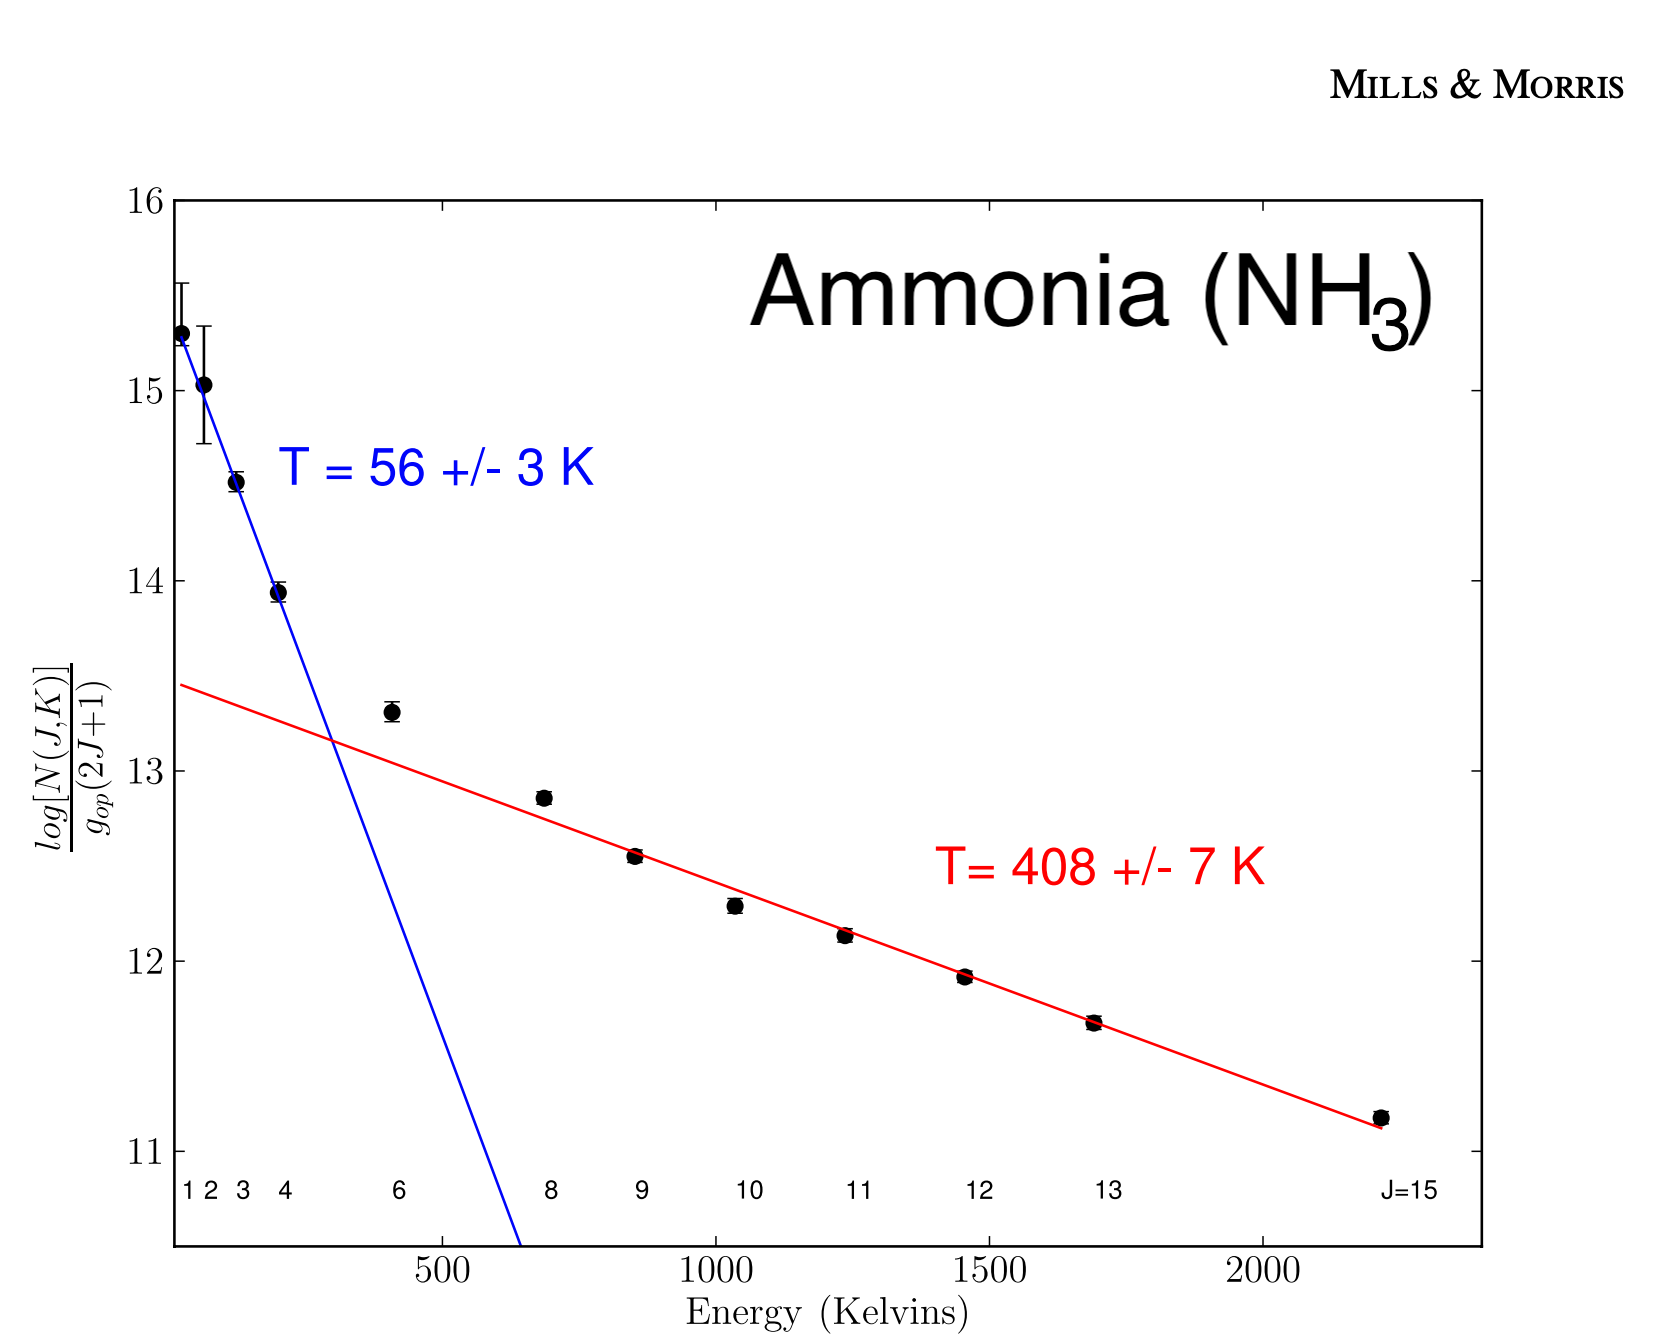


# Group/Individual Challenge!

Go to the Leiden Atomic and Molecular Database: https://home.strw.leidenuniv.nl/~moldata/
Pick an atom or ion (e.g., C, O, C+)

Open or download a file of the collisional rate coefficients as a function of temperature for various collisional partners. Select one of the transitions included in this file

Make three plots:

(1) Make an energy diagram of the two-level atom for the selected transition. Put the energy level in units of K on the Y axis, and label each level with its quantum numbers and spectroscopic term. Draw an arrow representing the transition between energy states that would be observed as a spectral line. Label the wavelength of the line. 

(2) For each collisional partner, plot the collisional rate coefficient as a function of temperature.

(3) For each collisional partner, estimate and plot the critical density as a function of temperature.





In [23]:
#Oxygen
m= 16*u.Da #molecular weight

Info=np.array([
   [1,0.000000000/u.cm,5.0,"3_P_2","2S+1","L","J = 3 P 2"],
   [2,158.2687410/u.cm,3.0,"3_P_1","2S+1","L","J = 3 P 1"],
   [3,226.9852492/u.cm,1.0,"3_P_0","2S+1","L","J = 3 P 0"]])



In [27]:
#Transition number,from level, to level,Einstein A, frequency Energy u
Info2=np.array([
    [1,2,1,8.910E-05,4744.77749,227.712],
    [2,3,1,1.340E-10,6804.84658,326.579],
    [3,3,2,1.750E-05,2060.06909,326.579]])
# /u.s *u.GHz *u.K 

In [29]:
nd= 5 #number of collision partner
#Collision: 5 O + H


T=np.array([10.000,20.000,30.000,40.000,60.000,80.000,110.00,160.00,220.00,320.00,450.00,630.00,890.00,1260.0,1780.0,2510.0,3550.0,5010.0,8000.0])
T=T*u.K
Info3=np.array([
    [7.0204e-11,8.2028e-11,9.0584e-11,9.8459e-11,1.1421e-10,1.3039e-10,1.5488e-10,1.9425e-10,2.3747e-10,2.9974e-10,3.6597e-10,4.3801e-10,5.1576e-10,5.9551e-10,6.7682e-10,7.6338e-10,8.6209e-10,9.7867e-10,1.1762e-09],
    [7.3118e-11,6.9519e-11,7.1053e-11,7.4232e-11,8.2569e-11,9.2191e-11,1.0783e-10,1.3515e-10,1.6763e-10,2.1768e-10,2.7340e-10,3.3530e-10,4.0291e-10,4.7408e-10,5.5063e-10,6.3692e-10,7.3695e-10,8.4933e-10,1.0160e-09],
    [1.2258e-10,1.1282e-10,1.1049e-10,1.1007e-10,1.1069e-10,1.1194e-10,1.1472e-10,1.2189e-10,1.3383e-10,1.5806e-10,1.9211e-10,2.3911e-10,3.0442e-10,3.9226e-10,5.0606e-10,6.4819e-10,8.2175e-10,1.0238e-09,1.3390e-09]])
Info3=Info3*u.cm**3 /u.s

print(Info3[0,0])

7.0204e-11 cm3 / s


In [68]:
#%% 1)
E_u=Info2[0,-1]*u.K
E_l=E_u-((Info2[0,-2]*1e9*u.Hz*const.h)/const.k_B) #We already know it is ground state so K=0 but this computation can 
                                                    # be applied to other transitions

plt.figure(1,figsize=(14,10))
fig=plt.subplot(1,1,1)
plt.plot((5,35),(10,10),lw=4,color='steelblue',zorder=0)
plt.text(36,10,'$E_l= %d K$'% E_l.value,fontsize=35,color='steelblue')
plt.plot((5,35),(20,20),lw=4,color='orange',zorder=1)
plt.text(36,20,'E_l= %d K'% E_u.value,fontsize=35,color='orange')
plt.ylim(0,30)
plt.xlim(0,40)
plt.arrow(20,20,0,-10,color='orange',lw=5,head_width=1,length_includes_head=True)
plt.text(20.5,18,'$A_{ul} $,f=4745 GHz ,3_P_2',fontsize=30,color='orange')
fig.axes.get_xaxis().set_ticks([])
fig.axes.get_yaxis().set_ticks([])
plt.ylabel('Energy $\\rightarrow$',fontsize=35);

SyntaxError: invalid syntax (<ipython-input-68-813f9bb8db87>, line 1)

Text(0, 0.5, 'Collision rate ($cm^3/s$)')

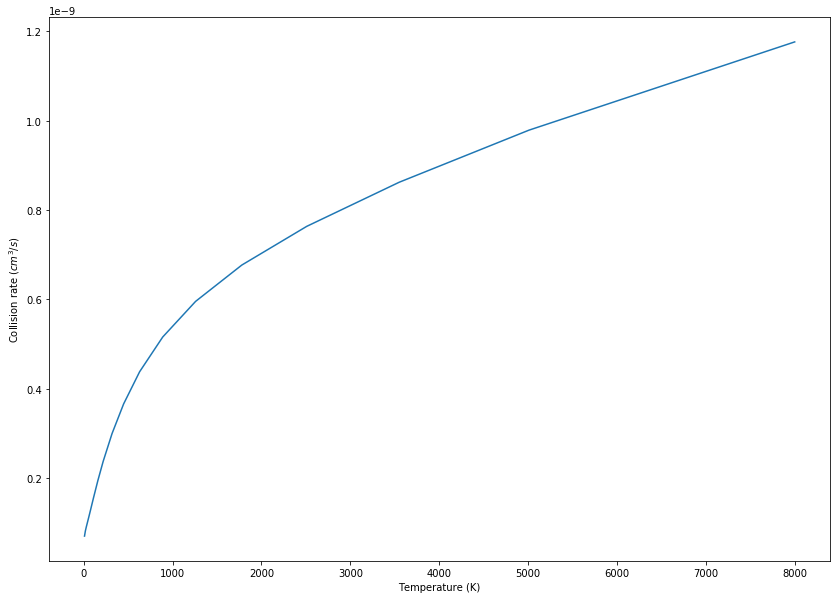

In [71]:
#%% 2

plt.figure(1,figsize=(14,10))
fig=plt.subplot(1,1,1)
plt.plot(T,Info3[0,:])
plt.xlabel('Temperature (K)')
plt.ylabel('Collision rate ($cm^3/s$)')
plt.title('5 O + H Collision rate vs Temperature')

1269158.4525098286 1 / cm3


Text(0.5, 1.0, '5 O + H Critical density vs Temperature')

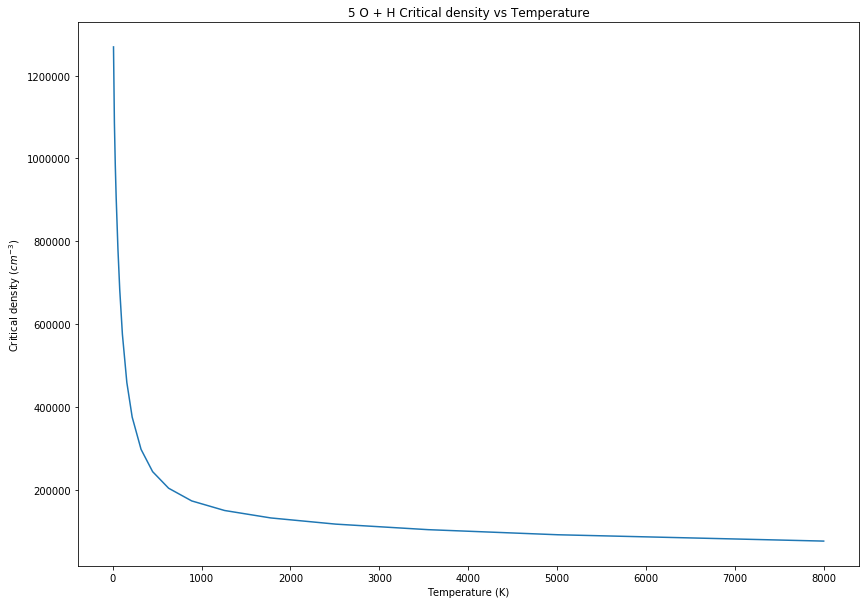

In [76]:
#%% 3

A=Info2[0,3]/u.s
n_crit=A/Info3[0,:]
print(n_crit[0])
plt.figure(1,figsize=(14,10))
fig=plt.subplot(1,1,1)
plt.plot(T,n_crit)
plt.xlabel('Temperature (K)')
plt.ylabel('Critical density ($cm^{-3}$)')
plt.title('5 O + H Critical density vs Temperature')